## <small>
Copyright (c) 2017-21 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning: A Visual Approach
## by Andrew Glassner, https://glassner.com
### Order: https://nostarch.com/deep-learning-visual-approach
### GitHub: https://github.com/blueberrymusic
------

### What's in this notebook

This notebook is provided as a “behind-the-scenes” look at code used to make some of the figures in this chapter. It is cleaned up a bit from the original code that I hacked together, and is only lightly commented. I wrote the code to be easy to interpret and understand, even for those who are new to Python. I tried never to be clever or even more efficient at the cost of being harder to understand. The code is in Python3, using the versions of libraries as of April 2021. 

This notebook may contain additional code to create models and images not in the book. That material is included here to demonstrate additional techniques.

Note that I've included the output cells in this saved notebook, but Jupyter doesn't save the variables or data that were used to generate them. To recreate any cell's output, evaluate all the cells from the start up to that cell. A convenient way to experiment is to first choose "Restart & Run All" from the Kernel menu, so that everything's been defined and is up to date. Then you can experiment using the variables, data, functions, and other stuff defined in this notebook.

### A note on variation of output

Note as always that due to the use of random numbers, some of the results here may differ from those in the book (since I re-ran everything to prepare this notebook), and will probably be different yet again if you run this notebook.

# Adapted by Daniel Acuna (acuna.io) for IST 700 Applied Deep Learning, iSchool, Syracuse University

## Chapter 18: Autoencoders - Notebook 2: MNIST 1

In [1]:
# Some code inspired or based on:
#    https://blog.keras.io/building-autoencoders-in-keras.html
#    https://jmetzen.github.io/2015-11-27/vae.html
#    https://arxiv.org/pdf/1606.05908.pdf  (https://github.com/cdoersch/vae_tutorial)
#

In [2]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
import numpy as np
import h5py
from pathlib import Path
import matplotlib.pyplot as plt

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

In [3]:
random_seed = 42
np.random.seed(random_seed)

# Read MNIST data. We won't be using the y_train or y_test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
pixels_per_image = np.prod(X_train.shape[1:])

# Cast values into the current floating-point type
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# Normalize the range from [0,255] to [0,1]
X_train /= 255.
X_test /= 255.

# Reshape the data into a grid with one row per sample, each row 784 (28*28) pixels
X_train = X_train.reshape((len(X_train), pixels_per_image))
X_test = X_test.reshape((len(X_test), pixels_per_image))

print("X_train.shape = ",X_train.shape, " X_test.shape = ",X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train.shape =  (60000, 784)  X_test.shape =  (10000, 784)


In [4]:
# Show a grid of MNIST images and our prediction for each one

def draw_predictions_set(predictions, filename=None):
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.subplot(2, 5, i+6)
        plt.imshow(predictions[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()    
    plt.show()

In [5]:
X_train.shape

(60000, 784)

In [6]:
# Build and train our first autoencoder
num_latent_vars = 20

AE1 = Sequential()
AE1.add(Dense(num_latent_vars, input_dim=pixels_per_image, activation='relu'))
AE1.add(Dense(pixels_per_image, activation='sigmoid'))
AE1.compile(optimizer='adam', loss='binary_crossentropy')
np.random.seed(42)

AE1.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 4s - loss: 0.2473 - val_loss: 0.1756
Epoch 2/50
469/469 - 1s - loss: 0.1601 - val_loss: 0.1451
Epoch 3/50
469/469 - 1s - loss: 0.1388 - val_loss: 0.1313
Epoch 4/50
469/469 - 1s - loss: 0.1296 - val_loss: 0.1253
Epoch 5/50
469/469 - 1s - loss: 0.1248 - val_loss: 0.1214
Epoch 6/50
469/469 - 1s - loss: 0.1214 - val_loss: 0.1185
Epoch 7/50
469/469 - 1s - loss: 0.1193 - val_loss: 0.1168
Epoch 8/50
469/469 - 1s - loss: 0.1180 - val_loss: 0.1159
Epoch 9/50
469/469 - 1s - loss: 0.1173 - val_loss: 0.1154
Epoch 10/50
469/469 - 1s - loss: 0.1170 - val_loss: 0.1150
Epoch 11/50
469/469 - 1s - loss: 0.1167 - val_loss: 0.1149
Epoch 12/50
469/469 - 1s - loss: 0.1166 - val_loss: 0.1148
Epoch 13/50
469/469 - 1s - loss: 0.1164 - val_loss: 0.1148
Epoch 14/50
469/469 - 1s - loss: 0.1163 - val_loss: 0.1146
Epoch 15/50
469/469 - 1s - loss: 0.1162 - val_loss: 0.1144
Epoch 16/50
469/469 - 1s - loss: 0.1161 - val_loss: 0.1143
Epoch 17/50
469/469 - 1s - loss: 0.1161 - val_loss: 0.1144
Epoch 

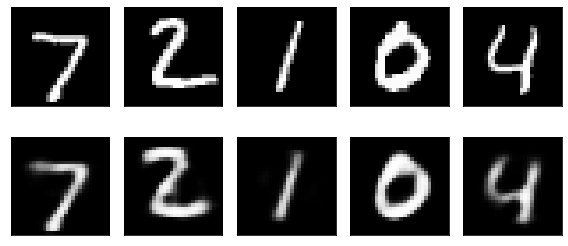

In [ ]:
predictions1 = AE1.predict(X_test)
draw_predictions_set(predictions1, 'NB2-MLP-AE1')

In [ ]:
# Build and train our second, more compress-y autoencoder
num_latent_vars = 10

AE2 = Sequential()
AE2.add(Dense(num_latent_vars, input_dim=pixels_per_image, activation='relu'))
AE2.add(Dense(pixels_per_image, activation='sigmoid'))
AE2.compile(optimizer='adam', loss='binary_crossentropy')

np.random.seed(42)
AE2.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 2s - loss: 0.2762 - val_loss: 0.2055
Epoch 2/50
469/469 - 1s - loss: 0.1883 - val_loss: 0.1747
Epoch 3/50
469/469 - 1s - loss: 0.1713 - val_loss: 0.1667
Epoch 4/50
469/469 - 2s - loss: 0.1663 - val_loss: 0.1632
Epoch 5/50
469/469 - 2s - loss: 0.1634 - val_loss: 0.1607
Epoch 6/50
469/469 - 1s - loss: 0.1613 - val_loss: 0.1589
Epoch 7/50
469/469 - 2s - loss: 0.1597 - val_loss: 0.1576
Epoch 8/50
469/469 - 1s - loss: 0.1585 - val_loss: 0.1564
Epoch 9/50
469/469 - 2s - loss: 0.1575 - val_loss: 0.1557
Epoch 10/50
469/469 - 2s - loss: 0.1568 - val_loss: 0.1551
Epoch 11/50
469/469 - 2s - loss: 0.1563 - val_loss: 0.1546
Epoch 12/50
469/469 - 1s - loss: 0.1558 - val_loss: 0.1542
Epoch 13/50
469/469 - 1s - loss: 0.1555 - val_loss: 0.1539
Epoch 14/50
469/469 - 1s - loss: 0.1552 - val_loss: 0.1536
Epoch 15/50
469/469 - 1s - loss: 0.1550 - val_loss: 0.1535
Epoch 16/50
469/469 - 1s - loss: 0.1547 - val_loss: 0.1533
Epoch 17/50
469/469 - 1s - loss: 0.1546 - val_loss: 0.1531
Epoch 

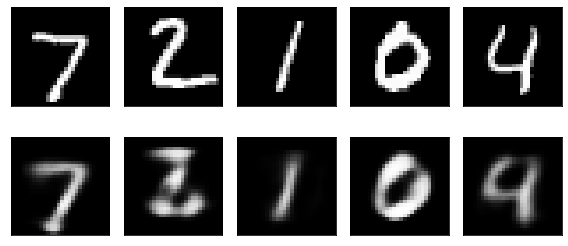

In [ ]:
predictions2 = AE2.predict(X_test)
draw_predictions_set(predictions2, 'NB2-MLP-AE2')

In [ ]:
# Build and train our third, super compress-y autoencoder
num_latent_vars = 3

AE3 = Sequential()
AE3.add(Dense(num_latent_vars, input_dim=pixels_per_image, activation='relu'))
AE3.add(Dense(pixels_per_image, activation='sigmoid'))
AE3.compile(optimizer='adam', loss='binary_crossentropy')

AE3.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 2s - loss: 0.3190 - val_loss: 0.2496
Epoch 2/50
469/469 - 2s - loss: 0.2417 - val_loss: 0.2323
Epoch 3/50
469/469 - 1s - loss: 0.2306 - val_loss: 0.2276
Epoch 4/50
469/469 - 1s - loss: 0.2271 - val_loss: 0.2249
Epoch 5/50
469/469 - 1s - loss: 0.2248 - val_loss: 0.2228
Epoch 6/50
469/469 - 1s - loss: 0.2231 - val_loss: 0.2214
Epoch 7/50
469/469 - 2s - loss: 0.2217 - val_loss: 0.2201
Epoch 8/50
469/469 - 2s - loss: 0.2206 - val_loss: 0.2191
Epoch 9/50
469/469 - 1s - loss: 0.2196 - val_loss: 0.2182
Epoch 10/50
469/469 - 1s - loss: 0.2188 - val_loss: 0.2175
Epoch 11/50
469/469 - 2s - loss: 0.2181 - val_loss: 0.2170
Epoch 12/50
469/469 - 1s - loss: 0.2176 - val_loss: 0.2166
Epoch 13/50
469/469 - 2s - loss: 0.2171 - val_loss: 0.2160
Epoch 14/50
469/469 - 2s - loss: 0.2166 - val_loss: 0.2157
Epoch 15/50
469/469 - 1s - loss: 0.2163 - val_loss: 0.2154
Epoch 16/50
469/469 - 1s - loss: 0.2159 - val_loss: 0.2151
Epoch 17/50
469/469 - 1s - loss: 0.2155 - val_loss: 0.2147
Epoch 

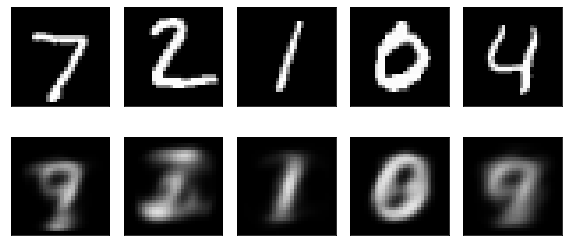

In [ ]:
predictions3 = AE3.predict(X_test)
draw_predictions_set(predictions3, 'NB2-MLP-AE3')

# Activity 1
Create a deeper autoencoder

In [8]:
# Creat a deeper 

num_latent_vars = 10


AE4 = Sequential()
# Define the rest of the layers
AE4.add(Dense(pixels_per_image,input_shape ,activation='relu'))
AE4.add(Dense(512, activation='relu'))
AE4.add(Dense(256, activation='relu'))
AE4.add(Dense(20, activation='relu'))
AE4.add(Dense(256, activation='relu'))
AE4.add(Dense(512, activation='relu'))
AE4.add(Dense(pixels_per_image, activation='sigmoid'))

AE4.compile(optimizer='adam', loss='binary_crossentropy')

np.random.seed(42)
AE4.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 3s - loss: 0.1826 - val_loss: 0.1328
Epoch 2/50
469/469 - 2s - loss: 0.1263 - val_loss: 0.1195
Epoch 3/50
469/469 - 2s - loss: 0.1169 - val_loss: 0.1129
Epoch 4/50
469/469 - 2s - loss: 0.1122 - val_loss: 0.1105
Epoch 5/50
469/469 - 2s - loss: 0.1093 - val_loss: 0.1077
Epoch 6/50
469/469 - 2s - loss: 0.1071 - val_loss: 0.1065
Epoch 7/50
469/469 - 2s - loss: 0.1055 - val_loss: 0.1051
Epoch 8/50
469/469 - 2s - loss: 0.1041 - val_loss: 0.1038
Epoch 9/50
469/469 - 2s - loss: 0.1031 - val_loss: 0.1034
Epoch 10/50
469/469 - 2s - loss: 0.1020 - val_loss: 0.1025
Epoch 11/50
469/469 - 2s - loss: 0.1013 - val_loss: 0.1018
Epoch 12/50
469/469 - 2s - loss: 0.1005 - val_loss: 0.1012
Epoch 13/50
469/469 - 2s - loss: 0.0999 - val_loss: 0.1009
Epoch 14/50
469/469 - 2s - loss: 0.0993 - val_loss: 0.1003
Epoch 15/50
469/469 - 2s - loss: 0.0988 - val_loss: 0.1001
Epoch 16/50
469/469 - 2s - loss: 0.0983 - val_loss: 0.1008
Epoch 17/50
469/469 - 2s - loss: 0.0978 - val_loss: 0.0995
Epoch 

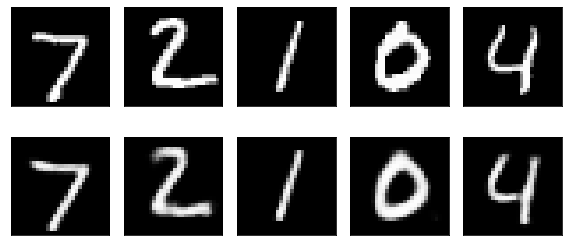

In [9]:
# Activity 1. Draw deep autoencoder with 6 layers
predictions4 = AE4.predict(X_test)
draw_predictions_set(predictions4, 'NB2-MLP-AE4-Myself')

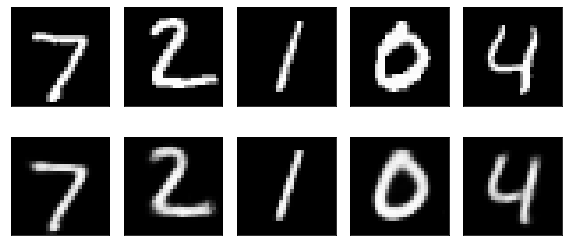

In [ ]:
predictions4 = AE4.predict(X_test)
draw_predictions_set(predictions4, 'NB2-MLP-AE4')

In [10]:
# rebuild AE4 with the Functional API so we can play with the decoder alone
from keras.layers import Input

num_latent_vars = 20

AE5_encoder_input = Input(shape=(784,))
AE5_encoder_512 = Dense(512, activation='relu')
AE5_encoder_256 = Dense(256, activation='relu')
AE5_encoder_latent = Dense(num_latent_vars, activation='relu')

AE5_decoder_256 = Dense(256, activation='relu')
AE5_decoder_512 = Dense(512, activation='relu')
AE5_decoder_out = Dense(784, activation='sigmoid')
# nested fucntion
AE5_encoder_step_1 = AE5_encoder_512(AE5_encoder_input)
AE5_encoder_step_2 = AE5_encoder_256(AE5_encoder_step_1)
AE5_encoder_output = AE5_encoder_latent(AE5_encoder_step_2)

AE5_decoder_step_1 = AE5_decoder_256(AE5_encoder_output)
AE5_decoder_step_2 = AE5_decoder_512(AE5_decoder_step_1)
AE5_decoder_output = AE5_decoder_out(AE5_decoder_step_2)
# How is the Model function used! 
AE5 = Model(AE5_encoder_input, AE5_decoder_output)

AE5_encoder_only_model = Model(AE5_encoder_input, AE5_encoder_output)

AE5_decoder_only_input = Input(shape=(num_latent_vars,))
AE5_decoder_only_step_1 = AE5_decoder_256(AE5_decoder_only_input)
AE5_decoder_only_step_2 = AE5_decoder_512(AE5_decoder_only_step_1)
AE5_decoder_only_output = AE5_decoder_out(AE5_decoder_only_step_2)
AE5_decoder_only_model = Model(AE5_decoder_only_input, AE5_decoder_only_output)

In [11]:
AE5.compile(optimizer='adam', loss='binary_crossentropy')

np.random.seed(42)
AE5.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 3s - loss: 0.1685 - val_loss: 0.1170
Epoch 2/50
469/469 - 2s - loss: 0.1123 - val_loss: 0.1063
Epoch 3/50
469/469 - 2s - loss: 0.1049 - val_loss: 0.1015
Epoch 4/50
469/469 - 2s - loss: 0.1010 - val_loss: 0.0988
Epoch 5/50
469/469 - 2s - loss: 0.0984 - val_loss: 0.0970
Epoch 6/50
469/469 - 2s - loss: 0.0966 - val_loss: 0.0954
Epoch 7/50
469/469 - 2s - loss: 0.0951 - val_loss: 0.0941
Epoch 8/50
469/469 - 2s - loss: 0.0938 - val_loss: 0.0934
Epoch 9/50
469/469 - 2s - loss: 0.0928 - val_loss: 0.0925
Epoch 10/50
469/469 - 2s - loss: 0.0920 - val_loss: 0.0918
Epoch 11/50
469/469 - 2s - loss: 0.0912 - val_loss: 0.0914
Epoch 12/50
469/469 - 2s - loss: 0.0906 - val_loss: 0.0908
Epoch 13/50
469/469 - 2s - loss: 0.0899 - val_loss: 0.0903
Epoch 14/50
469/469 - 2s - loss: 0.0895 - val_loss: 0.0899
Epoch 15/50
469/469 - 2s - loss: 0.0890 - val_loss: 0.0897
Epoch 16/50
469/469 - 2s - loss: 0.0885 - val_loss: 0.0898
Epoch 17/50
469/469 - 2s - loss: 0.0881 - val_loss: 0.0891
Epoch 

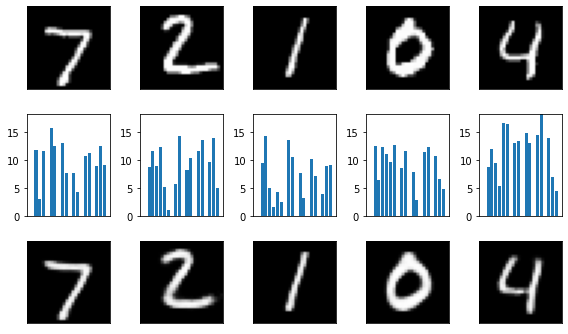

In [12]:
# show the input data, its latent values, and the corresponding predicted images
np.random.seed(random_seed)
encoder_predictions = AE5_encoder_only_model.predict(X_test)

plt.figure(figsize=(8, 5))
latent_min = np.min(encoder_predictions[0:5])
latent_max = np.max(encoder_predictions[0:5])
for i in range(5):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    plt.subplot(3, 5, i+6)
    plt.bar(np.arange(len(encoder_predictions[i])), encoder_predictions[i])
    plt.xticks([], [])
    plt.ylim(latent_min, latent_max)
    
    plt.subplot(3, 5, i+11)
    decoder_model_input = np.resize(encoder_predictions[i], (1, len(encoder_predictions[i])))
    decoder_prediction = AE5_decoder_only_model.predict(decoder_model_input)
    plt.imshow(decoder_prediction.reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

In [13]:
# show the latent values and the corresponding predicted images
# this makes big vertical spaces between the 
def show_latents_and_predictions(predictions, filename=None):
    plt.figure(figsize=(8, 4))
    latent_min = np.min(predictions[0:5])
    latent_max = np.max(predictions[0:5])
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.bar(np.arange(len(predictions[i])), predictions[i])
        plt.xticks([], [])
        plt.ylim(latent_min, latent_max)

        plt.subplot(2, 5, i+6)
        decoder_model_input = np.resize(predictions[i], (1, len(predictions[i])))
        decoder_prediction = AE5_decoder_only_model.predict(decoder_model_input)
        plt.imshow(decoder_prediction.reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()    
    plt.show()

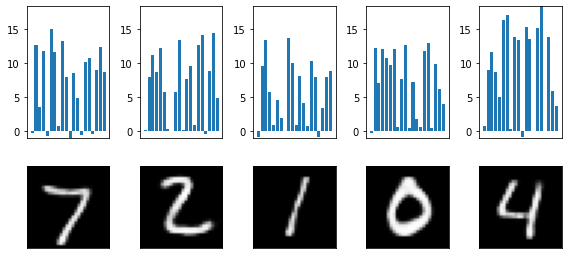

In [14]:
# add [-1,1] noise to all values
encoder_predictions = np.array(AE5_encoder_only_model.predict(X_test))
np.random.seed(random_seed)
noise = 1
for i in range(encoder_predictions.shape[0]):
    for j in range(len(encoder_predictions[i])):
        encoder_predictions[i][j] += np.random.uniform(low=-noise, high=noise)
show_latents_and_predictions(encoder_predictions, 'NB2-MLP-AE5-prediction-latent-values-with-noise-1')

# Activity #2
Add -10 to +10 noise to all variables

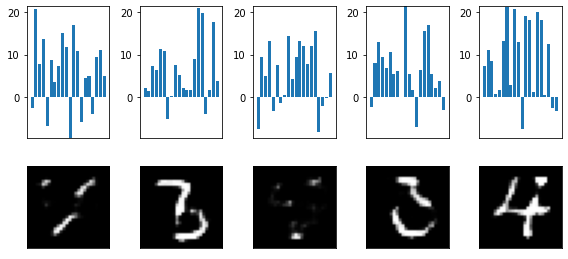

In [15]:
# your code here
encoder_predictions = np.array(AE5_encoder_only_model.predict(X_test))
np.random.seed(random_seed)
noise = 10
for i in range(encoder_predictions.shape[0]):
    for j in range(len(encoder_predictions[i])):
        encoder_predictions[i][j] += np.random.uniform(low=-noise, high=noise)
show_latents_and_predictions(encoder_predictions, 'NB2-MLP-AE5-prediction-latent-values-with-noise-10')

In [27]:
# make a functional model with 2 latent variables for the scatter plot
from keras.layers import Input

num_latent_vars = 2

AE6_encoder_input = Input(shape=(784,))
AE6_encoder_512 = Dense(512, activation='relu')
AE6_encoder_256 = Dense(256, activation='relu')
AE6_encoder_latent = Dense(num_latent_vars, activation='relu')

AE6_decoder_256 = Dense(256, activation='relu')
AE6_decoder_512 = Dense(512, activation='relu')
AE6_decoder_out = Dense(784, activation='sigmoid')

AE6_encoder_step_1 = AE6_encoder_512(AE6_encoder_input)
AE6_encoder_step_2 = AE6_encoder_256(AE6_encoder_step_1)
AE6_encoder_output = AE6_encoder_latent(AE6_encoder_step_2)

AE6_decoder_step_1 = AE6_decoder_256(AE6_encoder_output)
AE6_decoder_step_2 = AE6_decoder_512(AE6_decoder_step_1)
AE6_decoder_output = AE6_decoder_out(AE6_decoder_step_2)

AE6 = Model(AE6_encoder_input, AE6_decoder_output)

AE6_encoder_only_model = Model(AE6_encoder_input, AE6_encoder_output)

AE6_decoder_only_input = Input(shape=(num_latent_vars,))
AE6_decoder_only_step_1 = AE6_decoder_256(AE6_decoder_only_input)
AE6_decoder_only_step_2 = AE6_decoder_512(AE6_decoder_only_step_1)
AE6_decoder_only_output = AE6_decoder_out(AE6_decoder_only_step_2)
AE6_decoder_only_model = Model(AE6_decoder_only_input, AE6_decoder_only_output)

AE6.compile(optimizer='adam', loss='binary_crossentropy')

np.random.seed(42)
AE6.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 2s - loss: 0.2567 - val_loss: 0.2360
Epoch 2/50
469/469 - 2s - loss: 0.2311 - val_loss: 0.2276
Epoch 3/50
469/469 - 2s - loss: 0.2256 - val_loss: 0.2226
Epoch 4/50
469/469 - 2s - loss: 0.2105 - val_loss: 0.1973
Epoch 5/50
469/469 - 2s - loss: 0.1940 - val_loss: 0.1908
Epoch 6/50
469/469 - 2s - loss: 0.1889 - val_loss: 0.1878
Epoch 7/50
469/469 - 2s - loss: 0.1858 - val_loss: 0.1860
Epoch 8/50
469/469 - 2s - loss: 0.1835 - val_loss: 0.1829
Epoch 9/50
469/469 - 2s - loss: 0.1818 - val_loss: 0.1816
Epoch 10/50
469/469 - 2s - loss: 0.1801 - val_loss: 0.1805
Epoch 11/50
469/469 - 2s - loss: 0.1788 - val_loss: 0.1785
Epoch 12/50
469/469 - 2s - loss: 0.1778 - val_loss: 0.1780
Epoch 13/50
469/469 - 2s - loss: 0.1767 - val_loss: 0.1773
Epoch 14/50
469/469 - 2s - loss: 0.1756 - val_loss: 0.1761
Epoch 15/50
469/469 - 2s - loss: 0.1748 - val_loss: 0.1760
Epoch 16/50
469/469 - 2s - loss: 0.1742 - val_loss: 0.1747
Epoch 17/50
469/469 - 2s - loss: 0.1735 - val_loss: 0.1753
Epoch 

In [31]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# scatter plot from AE6
def draw_scatter(diameter, limits=None, filename=None):
    encoder_predictions = np.array(AE6_encoder_only_model.predict(X_test))
    np.random.seed(random_seed)

    plt.clf()
    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(111, aspect='equal')

    # display a 2D plot of the digit classes in the latent space
    clrs = [ 'red', 'sandybrown', 'sienna', 'gold', 'palegreen',
            'limegreen', 'deepskyblue', 'blue', 'plum', 'magenta' ]

    for i in range(len(encoder_predictions)):
        p = patches.Circle(encoder_predictions[i], diameter,
                            edgecolor='black', facecolor=clrs[y_test[i]])
        ax.add_patch(p)

    handle_list = []
    for i in range(10):
        p = patches.Patch(color=clrs[i], label=str(i))
        handle_list.append(p)
    ax.legend(handles=handle_list, loc='upper right', shadow=True)

    if limits:
        (pxmin, pxmax, pymin, pymax) = limits
    else:
        xmin = np.min(encoder_predictions[:,0])
        xmax = np.max(encoder_predictions[:,0])
        pxmin = xmin - (.05 * (xmax-xmin))
        pxmax = xmax + (.15 * (xmax-xmin))
        ymin = np.min(encoder_predictions[:,1])
        ymax = np.max(encoder_predictions[:,1])
        pymin = ymin - (.05 * (ymax-ymin))
        pymax = ymax + (.05 * (ymax-ymin))
    ax.set_ylim([pymin, pymax])
    ax.set_xlim([pxmin, pxmax])

    plt.show()

<Figure size 432x288 with 0 Axes>

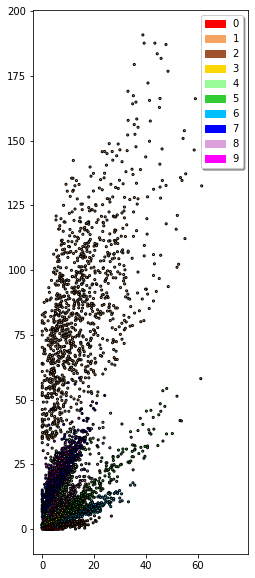

In [32]:
draw_scatter(.4, limits=None, filename='NB2-MLP-AE6-latent-scatter')

In [30]:
def draw_decoder_grid(steps=17, limits=None, filename=None):

    # display a 2D manifold of the digits
    digit_size = 28
    figure = np.zeros((digit_size * steps, digit_size * steps))
    grid_x = np.linspace(limits[1], limits[0], steps)
    grid_y = np.linspace(limits[2], limits[3], steps) 

    for i, yi in enumerate(grid_x):
        for j, xi in enumerate(grid_y):
            
            latents = np.array([[xi, yi]])
            decoder_prediction = AE6_decoder_only_model.predict(latents)
            
            digit = decoder_prediction[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(figure, cmap='gray')    
    plt.show()

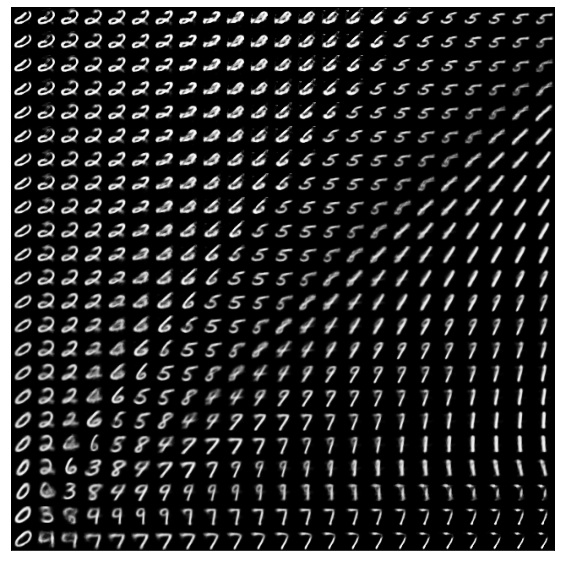

In [20]:
draw_decoder_grid(steps=23, limits=(0, 55, 0, 55), filename='NB2-MLP-AE6-17-decoder-grid')

# Activity #3
Explore the latent variables close to 0 (e.g., -1 to 10)

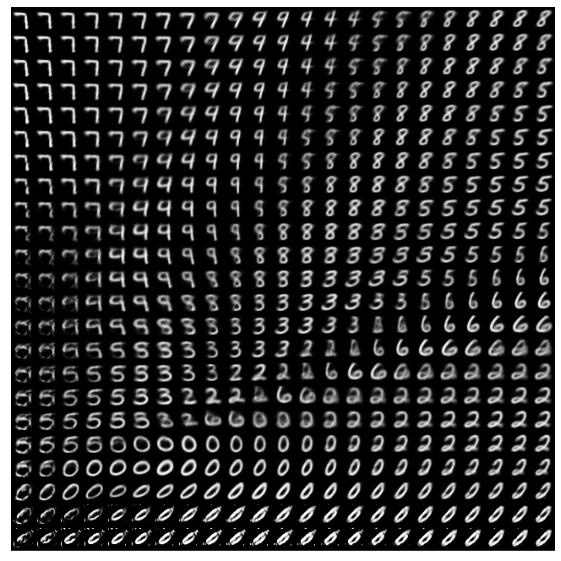

In [33]:
# your code here
draw_decoder_grid(steps=23, limits=(-1, 10, -1, 10), filename='NB2-MLP-AE6-17-decoder-grid')

# Convolutional autoencoders

In [34]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, Input, MaxPooling2D, UpSampling2D
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import h5py


In [35]:
# Data now has a different shape
random_seed = 42
np.random.seed(random_seed)

# load the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# cast the sample data to the current Keras floating-point type
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# reshape to 2D grid, one line per image
X_train = X_train.reshape(X_train.shape[0], number_of_pixels)
X_test = X_test.reshape(X_test.shape[0], number_of_pixels)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# reshape sample data to 4D tensor using channels_last convention
X_train = X_train.reshape(X_train.shape[0], image_height, image_width, 1)
X_test = X_test.reshape(X_test.shape[0], image_height, image_width, 1)

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [36]:
X_test.shape

(10000, 28, 28, 1)

In [37]:
# Convolutional autoencoder
CAE_encoder_input = Input(shape=(28,28, 1))
CAE_encoder_conv_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
CAE_encoder_pool_1 = MaxPooling2D((2,2), padding='same')
CAE_encoder_conv_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
CAE_encoder_pool_2 = MaxPooling2D((2,2), padding='same')
CAE_encoder_output = Conv2D(3, (3, 3), activation='relu', padding='same')

CAE_decoder_up_1 = UpSampling2D((2,2))
CAE_decoder_conv_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
CAE_decoder_up_2 = UpSampling2D((2,2))
CAE_decoder_output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

CAE_encoder_step_1 = CAE_encoder_conv_1(CAE_encoder_input)
CAE_encoder_step_2 = CAE_encoder_pool_1(CAE_encoder_step_1)
CAE_encoder_step_3 = CAE_encoder_conv_2(CAE_encoder_step_2)
CAE_encoder_step_4 = CAE_encoder_pool_2(CAE_encoder_step_3)
CAE_encoder_step_5 = CAE_encoder_output(CAE_encoder_step_4)

CAE_decoder_step_1 = CAE_decoder_up_1(CAE_encoder_step_5)
CAE_decoder_step_2 = CAE_decoder_conv_1(CAE_decoder_step_1)
CAE_decoder_step_3 = CAE_decoder_up_2(CAE_decoder_step_2)
CAE_decoder_step_4 = CAE_decoder_output(CAE_decoder_step_3)


Conv_AE = Model(CAE_encoder_input, CAE_decoder_step_4)
Conv_AE.compile(optimizer='adam', loss='binary_crossentropy')


Conv_AE_encoder_only_model = Model(CAE_encoder_input, CAE_encoder_step_5)
                    
Conv_AE_decoder_only_input = Input(shape=(7, 7, 3))
Conv_AE_decoder_only_step_1 = CAE_decoder_up_1(Conv_AE_decoder_only_input)
Conv_AE_decoder_only_step_2 = CAE_decoder_conv_1(Conv_AE_decoder_only_step_1)
Conv_AE_decoder_only_step_3 = CAE_decoder_up_2(Conv_AE_decoder_only_step_2)
Conv_AE_decoder_only_step_4 = CAE_decoder_output(Conv_AE_decoder_only_step_3)
                      
Conv_AE_decoder_only_model = Model(Conv_AE_decoder_only_input, Conv_AE_decoder_only_step_4)

In [38]:
Conv_AE.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 31s - loss: 0.1898 - val_loss: 0.0972
Epoch 2/50
469/469 - 3s - loss: 0.0922 - val_loss: 0.0868
Epoch 3/50
469/469 - 3s - loss: 0.0853 - val_loss: 0.0825
Epoch 4/50
469/469 - 3s - loss: 0.0824 - val_loss: 0.0804
Epoch 5/50
469/469 - 3s - loss: 0.0806 - val_loss: 0.0791
Epoch 6/50
469/469 - 3s - loss: 0.0795 - val_loss: 0.0783
Epoch 7/50
469/469 - 3s - loss: 0.0786 - val_loss: 0.0776
Epoch 8/50
469/469 - 3s - loss: 0.0780 - val_loss: 0.0769
Epoch 9/50
469/469 - 3s - loss: 0.0774 - val_loss: 0.0765
Epoch 10/50
469/469 - 3s - loss: 0.0770 - val_loss: 0.0760
Epoch 11/50
469/469 - 3s - loss: 0.0766 - val_loss: 0.0758
Epoch 12/50
469/469 - 3s - loss: 0.0762 - val_loss: 0.0753
Epoch 13/50
469/469 - 3s - loss: 0.0759 - val_loss: 0.0750
Epoch 14/50
469/469 - 3s - loss: 0.0756 - val_loss: 0.0747
Epoch 15/50
469/469 - 3s - loss: 0.0753 - val_loss: 0.0745
Epoch 16/50
469/469 - 3s - loss: 0.0750 - val_loss: 0.0742
Epoch 17/50
469/469 - 3s - loss: 0.0748 - val_loss: 0.0741
Epoch

In [39]:
def draw_predictions_set(predictions, filename=None):
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.subplot(2, 5, i+6)
        plt.imshow(predictions[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()    
    plt.show()

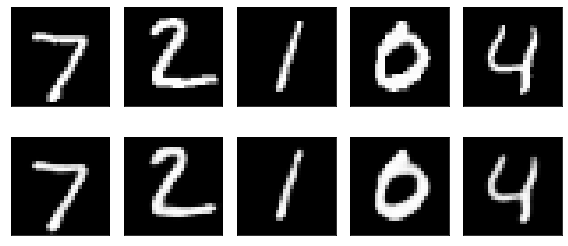

In [40]:
# it should be much higher quality than before
Conv_predictions = Conv_AE.predict(X_test)
draw_predictions_set(Conv_predictions, 'NB3-ConvAE-predictions')

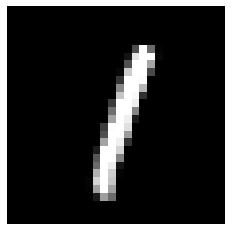

In [45]:
# Denoising
plt.imshow(X_test[5][:,:,0], "gray")
plt.axis('off');

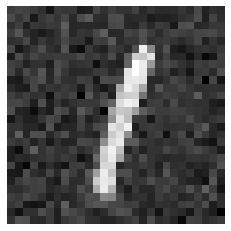

In [43]:
# Add noise
noisy_input = X_test[5] + np.random.normal(loc=0.0, scale=0.1, size=X_test[0].shape)
plt.imshow(noisy_input[:,:,0], "gray")
plt.axis('off');

In [49]:
# Let's encode it
noisy_input.shape

(28, 28, 1)

In [64]:
# needs to add batch dimension
# show just 1 picture!
noisy_encoding = Conv_AE_encoder_only_model.predict(np.expand_dims(noisy_input, 0))

In [47]:
noisy_decoding = Conv_AE_decoder_only_model.predict(noisy_encoding)

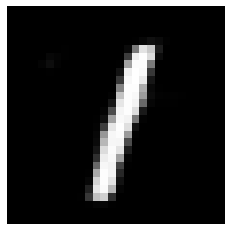

In [48]:
# remove batch and channel dimensions
plt.imshow(noisy_decoding[0, :, :, 0], 'gray')
plt.axis('off');

# Activity #4

Add even more noise to the input (gaussian noise with scale 0.4). Can it reconstruct it properly?

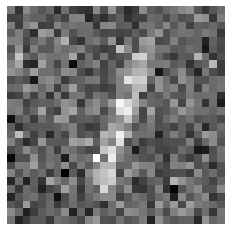

In [54]:
# your code here
noisy_input = X_test[5] + np.random.normal(loc=0.0, scale=0.4, size=X_test[0].shape)
plt.imshow(noisy_input[:,:,0], "gray")
plt.axis('off');

In [67]:
noisy_encoding = Conv_AE_encoder_only_model.predict(np.expand_dims(noisy_input, 0))

In [72]:
np.expand_dims(noisy_input, ).shape

(28, 28, 1, 1)

In [68]:
noisy_decoding = Conv_AE_decoder_only_model.predict(noisy_encoding)

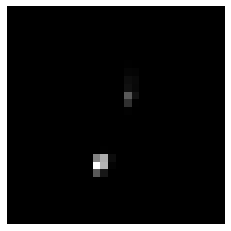

In [69]:
plt.imshow(noisy_decoding[0, :, :, 0], 'gray')
plt.axis('off');